In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

## 原始數據

In [2]:
y = [33, 56 , 87, 104, 160 ,183, 133, 216, 281, 382, 384, 442, 431, 439, 551, 744, 874, 1209, 1199, 1210, 1390, 1626, 2386, 2969, 3766, 4126, 5172, 5221, 6339, 8923, 11517, 12313, 15033, 17085, 17858, 23139, 28460, 30035, 36168, 46377, 44294, 40263, 50780, 57188, 65385, 64972]
n = len(y)
x = [*range(n)]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

45天前 [33]
44天前 [56]
43天前 [87]
42天前 [104]
41天前 [160]
40天前 [183]
39天前 [133]
38天前 [216]
37天前 [281]
36天前 [382]
35天前 [384]
34天前 [442]
33天前 [431]
32天前 [439]
31天前 [551]
30天前 [744]
29天前 [874]
28天前 [1209]
27天前 [1199]
26天前 [1210]
25天前 [1390]
24天前 [1626]
23天前 [2386]
22天前 [2969]
21天前 [3766]
20天前 [4126]
19天前 [5172]
18天前 [5221]
17天前 [6339]
16天前 [8923]
15天前 [11517]
14天前 [12313]
13天前 [15033]
12天前 [17085]
11天前 [17858]
10天前 [23139]
9天前 [28460]
8天前 [30035]
7天前 [36168]
6天前 [46377]
5天前 [44294]
4天前 [40263]
3天前 [50780]
2天前 [57188]
1天前 [65385]
0天前 [64972]


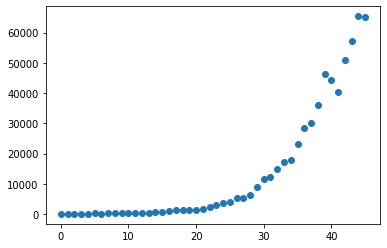

In [3]:
print(*[f'{n-i-1}天前 {y[i]}' for i in range(n)], sep='\n')
plt.scatter(x, y)

## 使用多項式回歸

### degree = 7

array([[ 71405.81672423],
       [ 76614.3029593 ],
       [ 82144.90601263],
       [ 88135.7006262 ],
       [ 94772.05753046],
       [102294.94354449],
       [111009.99331162],
       [121297.38349451],
       [133622.54025439],
       [148547.71083888],
       [166744.43010272],
       [189006.91278601],
       [216266.4023741 ],
       [249606.50736414],
       [290279.55576199],
       [339723.99863459],
       [399582.89354178],
       [471723.49867226],
       [558258.00850809],
       [661565.46184197]])

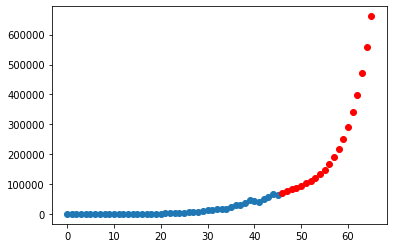

In [7]:
poly = PolynomialFeatures(degree=7)
x_poly = poly.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model2.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)

## degree = 4

array([[ 74061.44267319],
       [ 80453.53082932],
       [ 87177.47981932],
       [ 94239.1219001 ],
       [101644.10562409],
       [109397.89583916],
       [117505.77368871],
       [125972.83661159],
       [134803.99834216],
       [144003.98891024],
       [153577.35464115],
       [163528.45815568],
       [173861.47837013],
       [184580.41049625],
       [195689.0660413 ],
       [207191.07280802],
       [219089.87489462],
       [231388.73269481],
       [244090.72289778],
       [257198.7384882 ],
       [270715.48874622],
       [284643.49924748],
       [298985.11186312],
       [313742.48475973],
       [328917.59239941],
       [344512.22553974],
       [360527.99123377],
       [376966.31283006],
       [393828.42997263],
       [411115.39860099]])

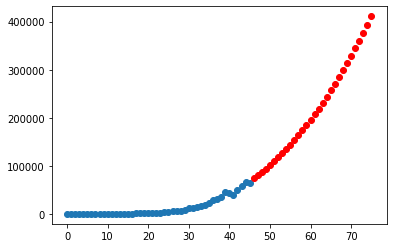

In [5]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly, y)

nx = np.array([*range(n, n+30)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model3.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)